<a href="https://colab.research.google.com/github/CalvinMPayne/ColabForLab-Linear-Fit-Errorbars/blob/main/Magnetization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnetization Lab part 2.

## Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| BK-1972 Power Supply | PASCO | TD-8553 | 001369 |
| Sigilent Oscilloscope | PASCO | TD-8555 | N/A |
| Primary Solenoid | Fluke | 117 | 49640102SV | 
| Secondary Solenoid | Fluke | DM7650023 | 002111 |
| Iron bar | N/A | N/A | N/A |
|  | N/A | N/A | N/A |

# Analysis

##Import Libraries and Data

In [3]:
!pip install whit-phys-util

     |████████████████████████████████| 10.1MB 9.0MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc

Mounted at /content/drive


##Connect to Github

In [5]:
repo = buc.local_repository("https://github.com/WhitworthPhysics/magnetization-part-1-CalvinMPayne")

Cloning repository from GitHub.


## Data import

In [6]:
df_air=pd.read_csv('data_emf_air.csv')

In [7]:
df_iron=pd.read_csv('data_emf_iron.csv')

##Analysis

AIR

In [8]:
n1=235
n2=2090
Area=2*np.pi*(1.7/2)**2

In [23]:
df_air['H']=n2*df_air['Currents (A)']

In [24]:
df_air['dB0']=df_air['EMF integral (V/s)']/(n2*Area)

In [25]:
df_air['B0']=0.0

In [26]:
for i in range(1, df_air['B0'].size):
  df_air.loc[i, 'B0'] = df_air.loc[i-1, 'B0'] + df_air.loc[i, 'dB0']

In [27]:
fitTable, fitFunc = buc.prettyPolyFit(df_air['B0'], df_air['H'])
fitTable

,slope,intercept
value,1.050994e+07,2784.391837
uncertainty,3.541109e+07,1120.929107


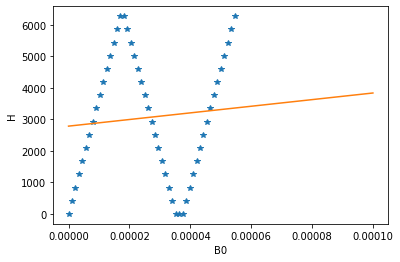

In [28]:
fig, ax = plt.subplots()
ax.plot(df_air['B0'], df_air['H'], "*")
ax.set_xlabel("B0")
ax.set_ylabel("H");
t_fit = np.linspace(0,.0001,2);
ax.plot(t_fit, fitFunc(t_fit));

In [22]:
print("The slope is (%.1f ± %.1f) " % tuple(fitTable['slope']))
print("The intercept is (%.1f ± %.1f) " % tuple(fitTable['intercept']))

The slope is (1181739.9 ± 3981630.3) m/s
The intercept is (313.1 ± 126.0) m


Iron